In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,stratify=binned_y)

In [3]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [4]:
from sklearn.model_selection import GridSearchCV
gs_inst = GridSearchCV(dtr, param_grid = {'max_depth':[3,5,7,9,20]},cv=10)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 20]})

In [5]:
gs_inst.best_estimator_

DecisionTreeRegressor(max_depth=3)

In [6]:
y_pred = gs_inst.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

48.00232010522167

In [7]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.42135759800248684

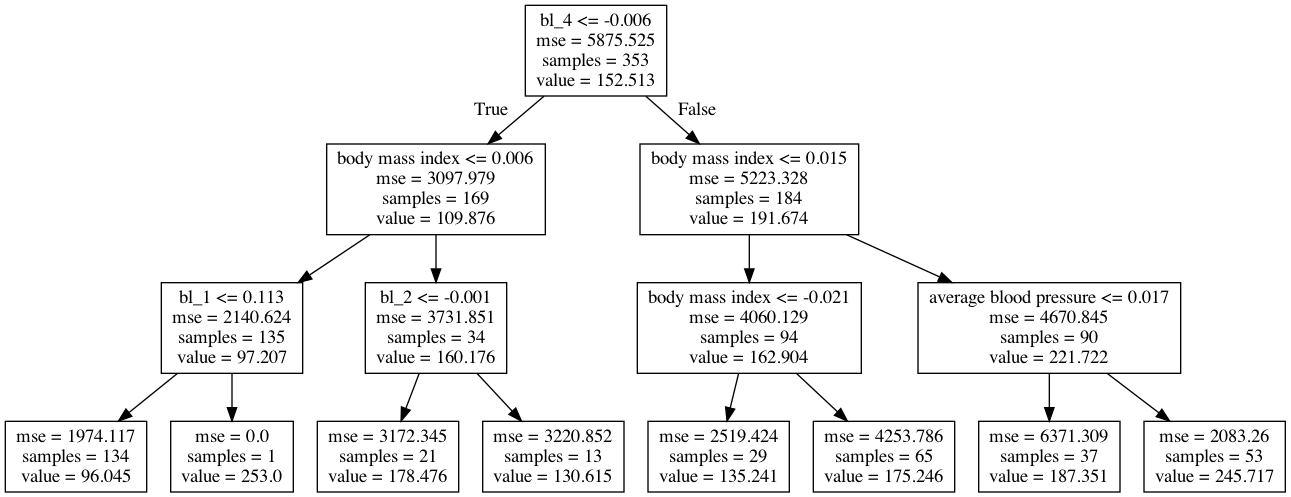

In [9]:
import numpy as np
from sklearn import tree
from six import StringIO
import pydot
from IPython.display import Image
dot_diabetes = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_diabetes,
feature_names = X_feature_names)
graph, = pydot.graph_from_dot_data(dot_diabetes.getvalue())
Image(graph.create_png())